# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

# Testing

Data Preview:
     SaleID RetailerCountry OrderMethod   RetailerType           ProductLine  \
0  SaleID_1   United States         Fax  Outdoors Shop  Personal Accessories   
1  SaleID_2   United States         Fax  Outdoors Shop      Sports Equipment   
2  SaleID_3   United States         Fax  Outdoors Shop                   NaN   
3  SaleID_4   United States         Fax  Outdoors Shop                   NaN   
4  SaleID_5   United States         NaN  Outdoors Shop  Personal Accessories   

    ProductType                    Product    Year  Quarter   Revenue  \
0  Cooking Gear  TrailChef Deluxe Cook Set  2018.0  Q1 2018  59728.66   
1  Cooking Gear     TrailChef Double Flame  2018.0  Q1 2018  36050.32   
2         Tents                  Star Dome  2018.0  Q1 2018  90040.48   
3         Tents               Star Gazer 2  2018.0  Q1 2018       NaN   
4     First Aid         Compact Relief Kit  2018.0  Q1 2018       NaN   

   Quantity  GrossMargin  
0     491.0     0.357548  
1     254.0 

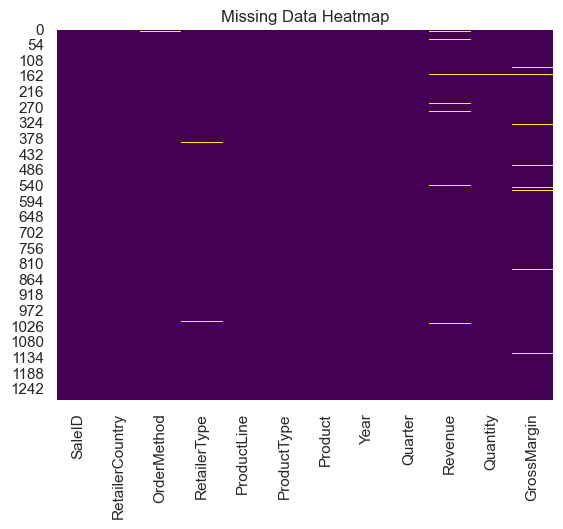


Duplicate Rows:
Empty DataFrame
Columns: [SaleID, RetailerCountry, OrderMethod, RetailerType, ProductLine, ProductType, Product, Year, Quarter, Revenue, Quantity, GrossMargin]
Index: []

Data after removing duplicates:
(1276, 12)


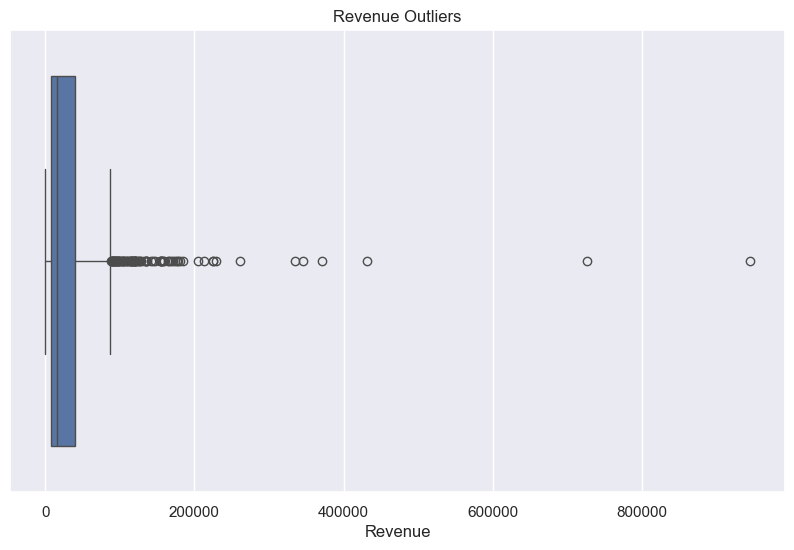

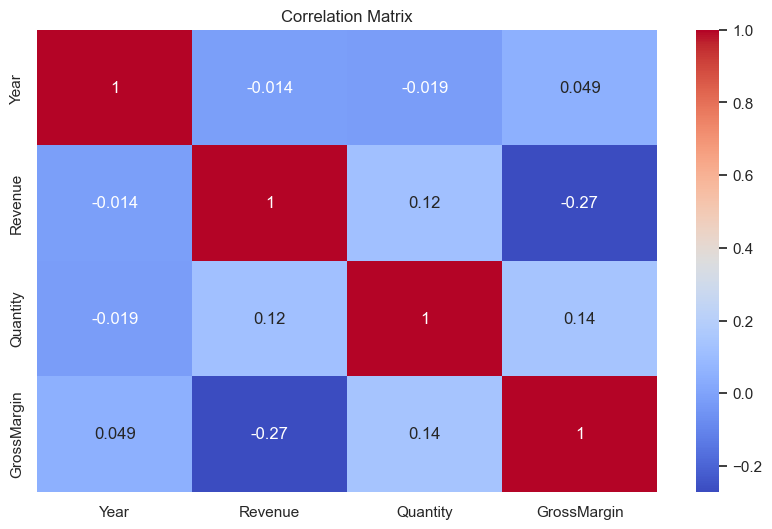

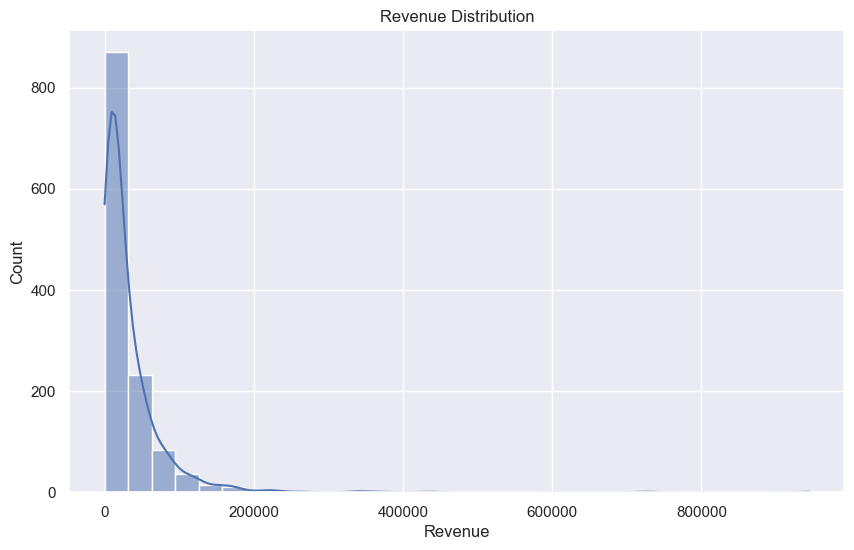


Duplicate Rows after cleaning:
Empty DataFrame
Columns: [SaleID, RetailerCountry, OrderMethod, RetailerType, ProductLine, ProductType, Product, Year, Quarter, Revenue, Quantity, GrossMargin]
Index: []

Data after outlier removal:
(1190, 12)

Data after row deletion:
(1139, 12)

Data after column deletion:
(1190, 4)

Data after imputation:
     SaleID RetailerCountry OrderMethod   RetailerType           ProductLine  \
0  SaleID_1   United States         Fax  Outdoors Shop  Personal Accessories   
1  SaleID_2   United States         Fax  Outdoors Shop      Sports Equipment   
3  SaleID_4   United States         Fax  Outdoors Shop  Personal Accessories   
4  SaleID_5   United States         NaN  Outdoors Shop  Personal Accessories   
5  SaleID_6   United States         Fax  Outdoors Shop     Camping Equipment   

    ProductType                    Product  Year  Quarter      Revenue  \
0  Cooking Gear  TrailChef Deluxe Cook Set  2018  Q1 2018  59728.66000   
1  Cooking Gear     TrailChef

In [10]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Setting Seaborn style for plots
sns.set()

# Load the dataset
raw_data = pd.read_csv('Sales-products.csv')

# Preview the first few rows of the dataset
print("Data Preview:")
print(raw_data.head())

# 1. Descriptive Statistics
# Displaying summary statistics for the dataset
print("\nDescriptive Statistics:")
print(raw_data.describe())

# 2. Handling Missing Values
# Checking for missing values
print("\nMissing Values Count:")
print(raw_data.isnull().sum())

# Visualizing missing data with a heatmap
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 3. Handling Duplicates
# Checking for duplicate rows
print("\nDuplicate Rows:")
duplicates = raw_data[raw_data.duplicated()]
print(duplicates)

# Removing duplicate rows and confirming new shape of the data
raw_data = raw_data.drop_duplicates()
print("\nData after removing duplicates:")
print(raw_data.shape)

# 4. Handling Outliers
# Visualizing outliers in the 'Revenue' column using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=raw_data['Revenue'])
plt.title('Revenue Outliers')
plt.show()

# 5. Handling Inconsistent Formats
# Filling missing values in the 'Year' column with a default value and converting to integer
raw_data['Year'] = raw_data['Year'].fillna(2000).astype(int)

# 6. Exploratory Data Analysis (EDA)
# Selecting numeric columns for correlation matrix analysis
numeric_cols = raw_data.select_dtypes(include=[np.number])

# Plotting a correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualizing the distribution of the 'Revenue' column
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['Revenue'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.show()

# 7. Handling Duplicates and Redundant Data
# Rechecking for duplicates after cleaning
print("\nDuplicate Rows after cleaning:")
duplicates = raw_data[raw_data.duplicated()]
print(duplicates)

# 8. Handling Outliers - Using the IQR Method
# Calculating IQR for 'Revenue' and defining the outlier condition
Q1 = raw_data['Revenue'].quantile(0.25)
Q3 = raw_data['Revenue'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (raw_data['Revenue'] < (Q1 - 1.5 * IQR)) | (raw_data['Revenue'] > (Q3 + 1.5 * IQR))

# Dropping rows with outliers in 'Revenue'
raw_data = raw_data[~outlier_condition]
print("\nData after outlier removal:")
print(raw_data.shape)

# 9. Handling Missing Values - Different Imputation Methods

# a) Row Deletion: Removing rows with missing values
row_deleted_data = raw_data.dropna()
print("\nData after row deletion:")
print(row_deleted_data.shape)

# b) Column Deletion: Removing columns with missing values
col_deleted_data = raw_data.dropna(axis=1)
print("\nData after column deletion:")
print(col_deleted_data.shape)

# c) Mean Imputation: Imputing missing values in 'Revenue' with mean
imputer_mean = SimpleImputer(strategy='mean')
raw_data['Revenue'] = imputer_mean.fit_transform(raw_data[['Revenue']])

# d) Median Imputation: Imputing missing values in 'Quantity' with median
imputer_median = SimpleImputer(strategy='median')
raw_data['Quantity'] = imputer_median.fit_transform(raw_data[['Quantity']])

# e) Mode Imputation: Imputing missing values in 'ProductLine' with mode
imputer_mode = SimpleImputer(strategy='most_frequent')
raw_data['ProductLine'] = imputer_mode.fit_transform(raw_data[['ProductLine']]).ravel()

# Displaying the dataset after imputation
print("\nData after imputation:")
print(raw_data.head())

# 10. Multiple Imputation using MICE (Multiple Imputation by Chained Equations)
# Using statsmodels for MICE imputation on numeric columns

# Selecting only numeric columns
numeric_data = raw_data.select_dtypes(include=[np.number])

# Applying MICE imputation
from statsmodels.imputation.mice import MICEData

mice_data = MICEData(numeric_data)
imputed_data = mice_data.data

# Reinserting non-numeric columns into the imputed dataset
imputed_data[numeric_data.columns] = imputed_data[numeric_data.columns]
imputed_data[raw_data.select_dtypes(exclude=[np.number]).columns] = raw_data.select_dtypes(exclude=[np.number])

# Displaying the dataset after MICE imputation
print("\nData after MICE Imputation:")
print(imputed_data.head())

# Saving the cleaned and imputed data
imputed_data.to_csv('cleaned_sales_data.csv', index=False)

print("Data cleaning and preprocessing complete!")


In conclusion, we observe that Asian(race: other) that has Tumor Size 35 has 74.110658 survival months to be alive.